<a href="https://colab.research.google.com/github/VishalAmbavade/Contelligenz/blob/main/Clustering_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Contelligenz Data Science/OTT Recommender System/Data/Raw Data

/content/gdrive/.shortcut-targets-by-id/1zUX2cs_LUVZEUVWeXs1TjALxiQz0Xuze/OTT Recommender System/Data/Raw Data


In [ ]:
import pandas as pd
import numpy as np
import pickle
import re
import datetime as dt

In [ ]:
df = pickle.load(open('user_events_raw.pkl','rb'))

In [ ]:
df.head()

,streamid,contentid,userid,subscription_plan_id,watchtime,duration,browser,devicename,country,cityname,subdivisionname
0,04d0a064-b96b-3f49-a8f3-d1f692a9fbb7,6e119257-4599-45f5-878f-2b6ab98ac480,edce2372-1a65-4333-984c-5d5d831e622d,None,2021-05-25 12:33:06,570,,Samsung SM-E625F,IN,Tanuku,Andhra Pradesh
1,edc77967-30a3-3155-87da-141b6441b0d5,ab6c94cd-8000-419e-995c-f97f07ac6ce5,edce2372-1a65-4333-984c-5d5d831e622d,None,2021-05-24 10:37:38,360,,Samsung SM-E625F,IN,Tanuku,Andhra Pradesh
2,9ef047ac-c370-3406-9d8f-1282a82f9157,948927a5-7e54-49f9-9abb-79f1e749acfc,edce2372-1a65-4333-984c-5d5d831e622d,None,2021-05-24 00:09:41,360,,Samsung SM-E625F,IN,Tanuku,Andhra Pradesh
3,652eaa8e-1b83-305c-a2b7-9dc2c81cd348,948927a5-7e54-49f9-9abb-79f1e749acfc,edce2372-1a65-4333-984c-5d5d831e622d,None,2021-05-24 00:00:11,420,,Samsung SM-E625F,IN,Hyderabad,Telangana
4,39aefc2e-0fff-32bb-872d-b33fa0d9a6c2,9b79eb7c-6ca9-4f0a-b1cb-c4afa4ffdffb,edce2372-1a65-4333-984c-5d5d831e622d,None,2021-05-23 23:36:21,240,,Samsung SM-E625F,IN,Hyderabad,Telangana


In [ ]:
%cd /content/gdrive/My Drive/Contelligenz Data Science/OTT Recommender System/Data/Processed Data

/content/gdrive/.shortcut-targets-by-id/1zUX2cs_LUVZEUVWeXs1TjALxiQz0Xuze/OTT Recommender System/Data/Processed Data


In [ ]:
df2 = pd.read_csv('content_catalog_v3.csv')

In [ ]:
df2 = df2.rename(columns = {"video_id":"contentid"})

In [ ]:
df2.head()

,title,Thumbnail 2X3 URL,runtime,free,parental_rating,Genre,Genre2,Available Geo,publish_date,content_type,total_views,Genres,Key Elements,Cast Popularity,Mood,Audience appeal,Content Exclusivity,Content Language,Is dubbed ?,Original Language,Original industry,Wikipedia URL,IMDB URL,IMDB ID,Original Title,Runtime IMDB,Year,IMDB Rating,IMDB Votes,Plot,Actors,Director,Poster,Release Date,Awards,Award Winning,contentid,video
0,11Th Hour,https://snagfilms-a.akamaihd.net/38c1e2aa-64c1...,11596,False,18+,Drama,NaN,India,08-Apr-21,Originals,9776,"Drama, Thriller, Crime","Performances, Plot, Direction, Screenplay",Very Popular,"Exciting , Suspenseful",All audience,Exclusive,Telugu,No,Telugu,Tollywood,https://en.wikipedia.org/wiki/11th_Hour_(web_s...,https://www.imdb.com/title/tt13429172,tt13429172,11th Hour,NaN,2021–,6.3,294.0,"Courageous, fearless, and ambitious - She's a ...","Tamannaah Bhatia, Richard Bhakti Klein, Rajiv ...",NaN,https://m.media-amazon.com/images/M/MV5BNmYwNj...,08 April 2021,NaN,No,1bf00638-81f4-456b-8d51-e36387a7f7a3,39
1,Y,https://snagfilms-a.akamaihd.net/38c1e2aa-64c1...,5480,False,13+,Drama,NaN,India,01-Apr-21,Movie,4594,"Thriller, Suspense","Plot, Screenplay, Direction, Plot",Popular,Exciting,All audience,Exclusive,Telugu,No,Telugu,Tollywood,0,https://www.imdb.com/title/tt14334034,tt14334034,Y,91 min,2021,8.5,85.0,When a film director is on the lookout for a s...,"Raghu Babu, Rahul Ramakrishna, Srikanth, Gemin...",Baalu Adusumilli,https://m.media-amazon.com/images/M/MV5BMzliYj...,02 April 2021,NaN,No,a99c674d-bd5d-4bc5-878f-702bc53ab58d,216
2,No 1 Yaari With Rana,https://snagfilms-a.akamaihd.net/38c1e2aa-64c1...,20310,False,NR,Talk show,NaN,India,28-Mar-21,Originals,9864,Talk-show,"Interaction, Entertainment",Very Popular,Entertaining,All audience,Exclusive,Telugu,No,Telugu,Tollywood,https://en.wikipedia.org/wiki/No._1_Yaari,https://www.imdb.com/title/tt9126600,tt9126600,McDowell's No.1 Yaari with Rana,44 min,2017–2021,7.2,27.0,No.1 Yaari with Rana Season 2 is a chat show w...,"Nag Ashwin, Vijay Deverakonda, Rana Daggubati",NaN,https://m.media-amazon.com/images/M/MV5BYzliNj...,28 March 2021,NaN,No,a15df463-f33c-4b5c-b85c-392f9f5093d7,208
3,Thellavarithe Guruvaram,https://snagfilms-a.akamaihd.net/38c1e2aa-64c1...,7088,False,13+,Romance,Comedy,India,15-Apr-21,Movie,676,"Comedy, Romance","Plot, Screenplay, Direction, Entertainment",Popular,"Funny , Feel Good , Exciting",All audience,Exclusive,Telugu,No,Telugu,Tollywood,https://en.wikipedia.org/wiki/Thellavarithe_Gu...,https://www.imdb.com/title/tt13843858,tt13843858,Thellavarithe Guruvaram,120 min,2021,6.9,390.0,Mr. Simha's character is on the verge of getti...,"Ajay, Harsha Chemudu, Vajja Venkata Giridhar",Manikanth Gelli,https://m.media-amazon.com/images/M/MV5BYWNhMD...,27 March 2021,NaN,No,1685b28d-1966-4d5a-8119-e8379d0f40a2,32
4,Chaavu Kaburu Challaga,https://snagfilms-a.akamaihd.net/38c1e2aa-64c1...,7576,False,13+,Drama,NaN,India,22-Apr-21,Movie,21805,"Comedy, Romance","Plot, Plot, Direction",Very Popular,"Funny , Emotional , Feel Good",All audience,Exclusive,Telugu,No,Telugu,Tollywood,https://en.wikipedia.org/wiki/Chaavu_Kaburu_Ch...,https://www.imdb.com/title/tt13130198,tt13130198,Chaavu Kaburu Challaga,137 min,2021,6.0,631.0,A mortuary van driver experiences love at firs...,"Kartikeya Gummakonda, Lavanya Tripathi, Aamani",Koushik Pegallapati,https://m.media-amazon.com/images/M/MV5BMGU2M2...,19 March 2021,NaN,No,132237d6-404f-48cd-abce-296e7a3d4f1e,27


In [ ]:
watchHistory = df[['userid', 'contentid', 'watchtime', 'duration']]

In [ ]:
catalogue = df2[['contentid', 'Genres', 'Mood', 'Actors', 'IMDB Rating', 'publish_date', 'parental_rating', 'runtime']]

In [ ]:
catalogue.head()

,contentid,Genres,Mood,Actors,IMDB Rating,publish_date,parental_rating,runtime
0,1bf00638-81f4-456b-8d51-e36387a7f7a3,"Drama, Thriller, Crime","Exciting , Suspenseful","Tamannaah Bhatia, Richard Bhakti Klein, Rajiv ...",6.3,08-Apr-21,18+,11596
1,a99c674d-bd5d-4bc5-878f-702bc53ab58d,"Thriller, Suspense",Exciting,"Raghu Babu, Rahul Ramakrishna, Srikanth, Gemin...",8.5,01-Apr-21,13+,5480
2,a15df463-f33c-4b5c-b85c-392f9f5093d7,Talk-show,Entertaining,"Nag Ashwin, Vijay Deverakonda, Rana Daggubati",7.2,28-Mar-21,NR,20310
3,1685b28d-1966-4d5a-8119-e8379d0f40a2,"Comedy, Romance","Funny , Feel Good , Exciting","Ajay, Harsha Chemudu, Vajja Venkata Giridhar",6.9,15-Apr-21,13+,7088
4,132237d6-404f-48cd-abce-296e7a3d4f1e,"Comedy, Romance","Funny , Emotional , Feel Good","Kartikeya Gummakonda, Lavanya Tripathi, Aamani",6.0,22-Apr-21,13+,7576


In [ ]:
catalogue.parental_rating.unique()

array(['18+', '13+', 'NR', 'U', 'UA', 'A'], dtype=object)

In [ ]:
type(catalogue.publish_date[1])

str

In [ ]:
df3 = pd.merge(watchHistory, catalogue, on = 'contentid', how = 'left')

In [ ]:
df3.head()

,userid,contentid,watchtime,duration,Genres,Mood,Actors,IMDB Rating,publish_date,parental_rating,runtime
0,edce2372-1a65-4333-984c-5d5d831e622d,6e119257-4599-45f5-878f-2b6ab98ac480,2021-05-25 12:33:06,570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,edce2372-1a65-4333-984c-5d5d831e622d,ab6c94cd-8000-419e-995c-f97f07ac6ce5,2021-05-24 10:37:38,360,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,edce2372-1a65-4333-984c-5d5d831e622d,948927a5-7e54-49f9-9abb-79f1e749acfc,2021-05-24 00:09:41,360,"Comedy, Drama, Romance","Entertaining , Playful","Chiranjeevi, Madhavi, Maruthirao Gollapudi, Po...",8.0,29-May-20,NR,7525.0
3,edce2372-1a65-4333-984c-5d5d831e622d,948927a5-7e54-49f9-9abb-79f1e749acfc,2021-05-24 00:00:11,420,"Comedy, Drama, Romance","Entertaining , Playful","Chiranjeevi, Madhavi, Maruthirao Gollapudi, Po...",8.0,29-May-20,NR,7525.0
4,edce2372-1a65-4333-984c-5d5d831e622d,9b79eb7c-6ca9-4f0a-b1cb-c4afa4ffdffb,2021-05-23 23:36:21,240,"Action, Adventure, Romance","Exciting , Playful","Karthi, Rakul Preet Singh, Karthik, Prakash Raj",4.8,21-Oct-20,U,9204.0


In [ ]:
df3_grouped = df3.groupby(['userid', 'contentid']).agg({'duration':'sum', 'runtime':'first', 'watchtime':'first', 'Genres':'first', 'Mood':'first', 'Actors':'first', 'IMDB Rating':'first', 'publish_date':'first', 'parental_rating':'first'})

In [ ]:
df3_grouped['view_percent'] = df3_grouped['duration'] / df3_grouped['runtime']

In [ ]:
df_grouped = df3_grouped.reset_index()

In [ ]:
df3_grouped.isna().sum()

duration                0
runtime            642832
watchtime               0
Genres             642832
Mood               642832
Actors             642980
IMDB Rating        643067
publish_date       642832
parental_rating    642832
view_percent       642832
dtype: int64

In [ ]:
len(df3_grouped) - df3_grouped.Genres.isna().sum()

264639

In [ ]:
df3_grouped.dropna(subset=['runtime'], inplace=True)

In [ ]:
df3_grouped.reset_index()

,userid,contentid,duration,runtime,watchtime,Genres,Mood,Actors,IMDB Rating,publish_date,parental_rating,view_percent
0,ebbb77a5e7d1b4083342281ee8b1509cdb486f3b2df993...,1dd5c35f-015a-4529-9d60-8d185b3f6d9f,510,9068.0,2021-05-02 05:57:05,"Drama, Thriller, Medical Thriller","Anxious , Depressing , Emotional","Parvathy Thiruvothu, Tovino Thomas, Rima Kalli...",7.9,27-Jan-21,U,0.056242
1,ebbb8da9-12e9-4826-9d5f-788f7bf2a76e,7eb9b774-9256-4e1b-88a7-22ab39f8e1ad,8550,8639.0,2021-05-11 06:07:56,"Action, Drama, Thriller, Vigilante","Unrealistic , Serious , Touching","Sivakarthikeyan, Abhay Deol, Arjun Sarja",6.4,30-Jul-20,U,0.989698
2,ebbb8da9-12e9-4826-9d5f-788f7bf2a76e,918ca200-8d2a-4236-a825-9ba26d75d922,0,8505.0,2021-05-08 06:09:07,"Crime, Mystery, Thriller","Curious , Smart , Suspenseful","Kunchacko Boban, Jinu Joseph, Unnimaya Prasad,...",8.0,18-Feb-21,18+,0.000000
3,ebbba3b51cd791646e1bce9dfab33f41f9c0d742ef30c4...,1685b28d-1966-4d5a-8119-e8379d0f40a2,0,7088.0,2021-05-18 03:10:27,"Comedy, Romance","Funny , Feel Good , Exciting","Ajay, Harsha Chemudu, Vajja Venkata Giridhar",6.9,15-Apr-21,13+,0.000000
4,ebbba3b51cd791646e1bce9dfab33f41f9c0d742ef30c4...,326d790b-8e0b-4639-8129-53d22a740bfe,6870,7369.0,2021-05-12 13:32:59,"Action, Comedy, Horror, Zombie","Anxious , Threatening , Entertaining","Teja Sajja, Anandhi, Daksha Nagarkar, R.J. Hemant",7.3,25-Mar-21,13+,0.932284
...,...,...,...,...,...,...,...,...,...,...,...,...
264634,fffff552-8111-4444-9e8c-d6f5f0384d5c,326d790b-8e0b-4639-8129-53d22a740bfe,840,7369.0,2021-04-23 09:13:19,"Action, Comedy, Horror, Zombie","Anxious , Threatening , Entertaining","Teja Sajja, Anandhi, Daksha Nagarkar, R.J. Hemant",7.3,25-Mar-21,13+,0.113991
264635,fffff552-8111-4444-9e8c-d6f5f0384d5c,9fe5e6f7-9def-4b52-8be6-5e74ef517784,1680,9558.0,2021-04-10 13:59:04,"Action , Romance","Heavy , Lovable","Allu Arjun, Sheela Kaur, Poonam Bajwa, Prakash...",7.1,17-Aug-20,U,0.175769
264636,fffff8bc-a107-4ed6-a6e5-4e505a0e5952,132237d6-404f-48cd-abce-296e7a3d4f1e,32940,7576.0,2021-04-23 08:32:26,"Comedy, Romance","Funny , Emotional , Feel Good","Kartikeya Gummakonda, Lavanya Tripathi, Aamani",6.0,22-Apr-21,13+,4.347941
264637,fffff8bc-a107-4ed6-a6e5-4e505a0e5952,1685b28d-1966-4d5a-8119-e8379d0f40a2,31470,7088.0,2021-04-16 03:46:22,"Comedy, Romance","Funny , Feel Good , Exciting","Ajay, Harsha Chemudu, Vajja Venkata Giridhar",6.9,15-Apr-21,13+,4.439898


In [ ]:
df3_grouped['watchtime'] = df3_grouped['watchtime'].dt.date

In [ ]:
df3_grouped.head()

duration  ...  view_percent
userid                                             contentid                                       ...              
ebbb77a5e7d1b4083342281ee8b1509cdb486f3b2df9937... 1dd5c35f-015a-4529-9d60-8d185b3f6d9f       510  ...      0.056242
ebbb8da9-12e9-4826-9d5f-788f7bf2a76e               7eb9b774-9256-4e1b-88a7-22ab39f8e1ad      8550  ...      0.989698
                                                   918ca200-8d2a-4236-a825-9ba26d75d922         0  ...      0.000000
ebbba3b51cd791646e1bce9dfab33f41f9c0d742ef30c46... 1685b28d-1966-4d5a-8119-e8379d0f40a2         0  ...      0.000000
                                                   326d790b-8e0b-4639-8129-53d22a740bfe      6870  ...      0.932284

[5 rows x 10 columns]

In [ ]:
from dateutil.parser import parse

In [ ]:
df3_grouped['publish_date'] = [parse(x) for x in df3_grouped['publish_date']]

In [ ]:
df3_grouped.head()

duration  ...  view_percent
userid                                             contentid                                       ...              
ebbb77a5e7d1b4083342281ee8b1509cdb486f3b2df9937... 1dd5c35f-015a-4529-9d60-8d185b3f6d9f       510  ...      0.056242
ebbb8da9-12e9-4826-9d5f-788f7bf2a76e               7eb9b774-9256-4e1b-88a7-22ab39f8e1ad      8550  ...      0.989698
                                                   918ca200-8d2a-4236-a825-9ba26d75d922         0  ...      0.000000
ebbba3b51cd791646e1bce9dfab33f41f9c0d742ef30c46... 1685b28d-1966-4d5a-8119-e8379d0f40a2         0  ...      0.000000
                                                   326d790b-8e0b-4639-8129-53d22a740bfe      6870  ...      0.932284

[5 rows x 10 columns]

In [ ]:
df_neat = pd.concat([df3_grouped, df3_grouped.Genres.str.split(', ', expand = True)], axis = 1)

In [ ]:
df_neat.columns

Index([       'duration',         'runtime',       'watchtime',
                'Genres',            'Mood',          'Actors',
           'IMDB Rating',    'publish_date', 'parental_rating',
          'view_percent',                 0,                 1,
                       2,                 3,                 4],
      dtype='object')

In [ ]:
df_neat = df_neat.rename(columns = {0:"Genre1", 1:"Genre2", 2:"Genre3", 3:"Genre4", 4:"Genre5"}, errors = "raise")

In [ ]:
df_neat = pd.concat([df_neat, df_neat.Mood.str.split(', ', expand = True)], axis = 1)

In [ ]:
df_neat = df_neat.rename(columns = {0:"Mood1", 1:"Mood2", 2:"Mood3", 3:"Mood4", 4:"Mood5"}, errors = "raise")

In [ ]:
df_neat = pd.concat([df_neat, df_neat.Actors.str.split(', ', expand = True)], axis = 1)

In [ ]:
df_neat = df_neat.rename(columns = {0:"Actor1", 1:"Actor2", 2:"Actor3", 3:"Actor4"}, errors = "raise")

In [ ]:
df_neat.isna().sum()

duration                0
runtime                 0
watchtime               0
Genres                  0
Mood                    0
Actors                148
IMDB Rating           235
publish_date            0
parental_rating         0
view_percent            0
Genre1                  0
Genre2               8301
Genre3             143236
Genre4             216833
Genre5             261324
Mood1                   0
Mood2               20873
Mood3              100943
Mood4              262880
Mood5              264591
Actor1                148
Actor2                281
Actor3                281
Actor4              58539
dtype: int64

In [ ]:
df_neat = df_neat.drop(['Genre4', 'Genre5', 'Mood4', 'Mood5', 'Actor4'], axis = 1)

In [ ]:
df_neat['publish_date'] = df_neat['publish_date'].dt.date

In [ ]:
### watchedAfter = the date of realising the movie - the date of watching the movie
df_neat['watchedAfter'] = df_neat['publish_date'] - df_neat['watchtime']

In [ ]:
df_neat.head()

duration  ...  watchedAfter
userid                                             contentid                                       ...              
ebbb77a5e7d1b4083342281ee8b1509cdb486f3b2df9937... 1dd5c35f-015a-4529-9d60-8d185b3f6d9f       510  ...      -95 days
ebbb8da9-12e9-4826-9d5f-788f7bf2a76e               7eb9b774-9256-4e1b-88a7-22ab39f8e1ad      8550  ...     -285 days
                                                   918ca200-8d2a-4236-a825-9ba26d75d922         0  ...      -79 days
ebbba3b51cd791646e1bce9dfab33f41f9c0d742ef30c46... 1685b28d-1966-4d5a-8119-e8379d0f40a2         0  ...      -33 days
                                                   326d790b-8e0b-4639-8129-53d22a740bfe      6870  ...      -48 days

[5 rows x 20 columns]

In [ ]:
df_neat = df_neat.reset_index()

In [ ]:
df_kmeans1 = df_neat[['userid', 'contentid', 'parental_rating', 'Genre1']]

In [ ]:
len(df_kmeans1.contentid.unique())

292

In [ ]:
df_kmeans1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264639 entries, 0 to 264638
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   userid           264639 non-null  object
 1   contentid        264639 non-null  object
 2   parental_rating  264639 non-null  object
 3   Genre1           264639 non-null  object
dtypes: object(4)
memory usage: 8.1+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_kmeans1['contentid'] = le.fit_transform(df_kmeans1['contentid'])
df_kmeans1['parental_rating'] = le.fit_transform(df_kmeans1['parental_rating'])
df_kmeans1['Genre1'] = le.fit_transform(df_kmeans1['Genre1'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
df_kmeans1.head()

,userid,contentid,parental_rating,Genre1
0,ebbb77a5e7d1b4083342281ee8b1509cdb486f3b2df993...,40,4,9
1,ebbb8da9-12e9-4826-9d5f-788f7bf2a76e,151,4,0
2,ebbb8da9-12e9-4826-9d5f-788f7bf2a76e,182,1,8
3,ebbba3b51cd791646e1bce9dfab33f41f9c0d742ef30c4...,32,0,6
4,ebbba3b51cd791646e1bce9dfab33f41f9c0d742ef30c4...,66,0,0


In [ ]:
X = df_kmeans1[['contentid', 'parental_rating', 'Genre1']]
cols = X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

In [ ]:
X.head()

,contentid,parental_rating,Genre1
0,40,4,9
1,151,4,0
2,182,1,8
3,32,0,6
4,66,0,0


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
label = kmeans.fit_predict(X)
label

array([1, 0, 0, ..., 1, 1, 0], dtype=int32)

In [ ]:
X['cluster'] = label

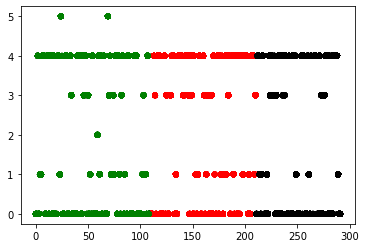

In [ ]:
filtered_label1 = X[label == 0]
filtered_label2 = X[label == 1]
filtered_label3 = X[label == 2]

plt.scatter(filtered_label1.contentid, filtered_label1.parental_rating, color = 'red', alpha=0.4)
plt.scatter(filtered_label2.contentid, filtered_label2.parental_rating, color = 'green', alpha = 0.4)
plt.scatter(filtered_label3.contentid, filtered_label3.parental_rating, color = 'black', alpha=0.4)
plt.show()

In [ ]:
df_neat1 = df_neat.loc[df_neat['view_percent'] > 0.0]

In [ ]:
print(len(df_neat))
print(len(df_neat1))

264639
230721


In [ ]:
df_neat1.groupby(['contentid'], sort = False).mean().sort_values(by = 'view_percent',ascending = False).head(10)

,duration,runtime,IMDB Rating,view_percent
contentid,,,,
04bf71fe-c7df-4209-82e9-59a63bcddcc6,14120.000000,7550.0,7.5,1.870199
1685b28d-1966-4d5a-8119-e8379d0f40a2,7323.667115,7088.0,6.9,1.033249
2415b22a-9154-42d1-8cc3-917d7c2f5e12,7312.758621,7171.0,8.2,1.019768
132237d6-404f-48cd-abce-296e7a3d4f1e,7161.435915,7576.0,6.0,0.945279
a99c674d-bd5d-4bc5-878f-702bc53ab58d,4815.253703,5480.0,8.5,0.878696
e03cbedb-21a2-4643-8b4d-aa5ef679c3e6,6828.256824,8276.0,8.0,0.825067
326d790b-8e0b-4639-8129-53d22a740bfe,6039.653648,7369.0,7.3,0.819603
02f61ed6-aaf4-480a-94ff-582164ea8ac2,7463.306773,9260.0,5.3,0.805973
918ca200-8d2a-4236-a825-9ba26d75d922,6846.825000,8505.0,8.0,0.805035
